# AOD

## langley calibration

### load calibration

In [4]:
import helpers

In [5]:
import atmPy.radiation.retrievals.langley_calibration as atmlc

<xarray.Dataset> Size: 168B
Dimensions:     (wavelength: 6)
Coordinates:
  * wavelength  (wavelength) int32 24B 415 500 670 870 940 1625
Data variables:
    V0          (wavelength) float64 48B 7.879 7.236 6.648 7.507 7.635 6.218
    V0_std      (wavelength) float64 48B 0.01213 0.01096 ... 0.06541 0.01074
    V0_stderr   (wavelength) float64 48B 0.001672 0.001801 ... 0.003058 0.002362

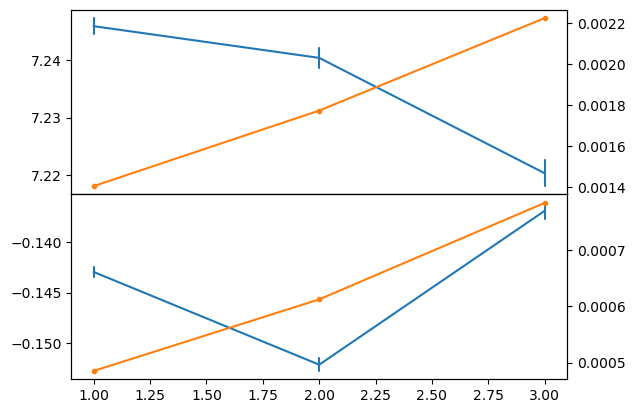

In [6]:
p2fld = pl.Path('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.1/')
lt = atmlc.open_langleys(p2fld)
lt648 = lt
lt.plot_ranked(wl = 500)
lt.V0_simple

<xarray.Dataset> Size: 192B
Dimensions:     (wavelength: 6)
Coordinates:
  * wavelength  (wavelength) int64 48B 415 500 670 870 940 1625
Data variables:
    V0          (wavelength) float64 48B 7.982 7.221 6.766 7.607 7.75 6.241
    V0_std      (wavelength) float64 48B 0.01455 0.01566 ... 0.07766 0.01615
    V0_stderr   (wavelength) float64 48B 0.001476 0.001463 ... 0.00293 0.002138

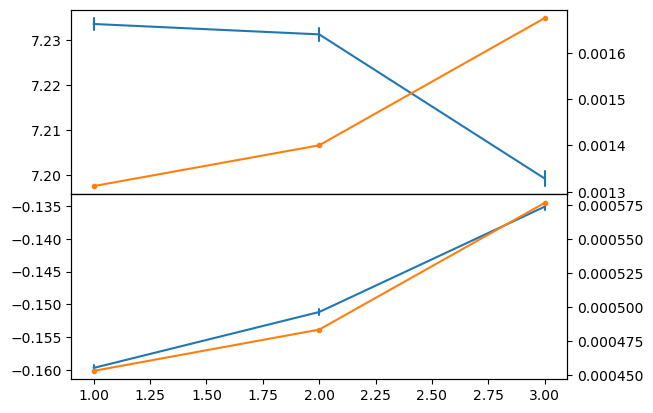

In [7]:
p2fld = pl.Path('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.1/')
lt = atmlc.open_langleys(p2fld)
lt649 = lt
lt.plot_ranked(wl = 500)
lt.V0_simple

### Load a file

## calibrate to irradiance

### what should the TOA irradiance be at that day, actually so the earth-sun distance is in full disply 

In [8]:
import atmPy.radiation.retrievals.spectral_irradiance as atmspec

In [34]:
reload(atmspec)

<module 'atmPy.radiation.retrievals.spectral_irradiance' from '/home/hagen/prog/atm-py/atmPy/radiation/retrievals/spectral_irradiance.py'>

/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = da

<xarray.DataArray 'channel_wavelength' (channel: 5)> Size: 40B
array([413.638 , 497.0534, 671.3347, 868.7689, 937.8038])
Coordinates:
  * channel  (channel) int64 40B 415 500 670 870 940


/home/hagen/prog/atm-py/atmPy/radiation/retrievals/spectral_irradiance.py:1316: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['co2'] = xr.DataArray(np.zeros(tuple(self.raw_data.dims[d] for d in ['datetime', 'channel'])),


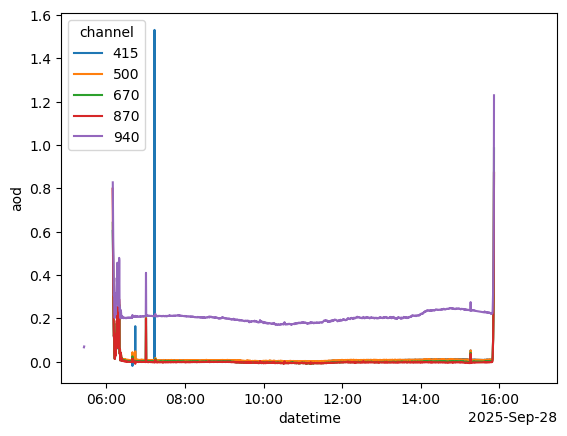

In [37]:
fn = '/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250928.nc'
fnmet = '/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20250928_preliminary.nc'
ds = xr.open_dataset(fn)

gdd = atmspec.CombinedGlobalDiffuseDirect(ds.copy())
gdd.dataset['channel_wavelength'] = gdd.dataset.channel_wavelength.astype(float) #error in processing upstream, fix it in future versions!

gdd = gdd.apply_calibration_langley(lt648)

dni = gdd.direct_normal_irradiation
dni.raw_data = dni.raw_data.where(dni.raw_data.channel < 1000, drop = True)
dni.met_data = fnmet
dni.ozone_data = 300
dni.aod.plot.line(x = 'datetime')
dni648 = dni

/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = da

<xarray.DataArray 'channel_wavelength' (channel: 5)> Size: 40B
array([414.3183, 496.7918, 671.7523, 868.9119, 937.9974])
Coordinates:
  * channel  (channel) int64 40B 415 500 670 870 940


/home/hagen/prog/atm-py/atmPy/radiation/retrievals/spectral_irradiance.py:1316: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['co2'] = xr.DataArray(np.zeros(tuple(self.raw_data.dims[d] for d in ['datetime', 'channel'])),


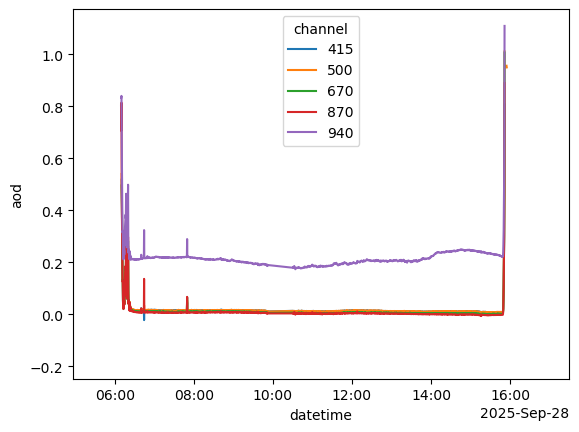

In [39]:
fn = '/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250928.nc'
fnmet = '/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20250928_preliminary.nc'
ds = xr.open_dataset(fn)

gdd = atmspec.CombinedGlobalDiffuseDirect(ds.copy())
gdd.dataset['channel_wavelength'] = gdd.dataset.channel_wavelength.astype(float) #error in processing upstream, fix it in future versions!

gdd = gdd.apply_calibration_langley(lt649)

dni = gdd.direct_normal_irradiation
dni.raw_data = dni.raw_data.where(dni.raw_data.channel < 1000, drop = True)
dni.met_data = fnmet
dni.ozone_data = 300
dni.aod.plot.line(x = 'datetime')
dni649 = dni

## compare to others

In [40]:
p2fld = pl.Path('/nfs/grad/campaign/frc/2025/AOD/')

In [41]:
list(p2fld.glob('**/*'))

[PosixPath('/nfs/grad/campaign/frc/2025/AOD/DE_PTB_CAS'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/US_NOAA_HSR1'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/ES_AEMET_CE'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/FR_LOA.UoL_CE'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/DE_PTB_SSIM'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/ES_UVa_MTS'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/DE_PTB_CAS-IR'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/SE_SMHI_PFR'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/ES_UV_POM'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/JP_JMA_POM'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/ES_CIEMAT_BTS'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/DE_DWD_PFR-F'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/CN_CMA_CW193'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/US_NOAA_MFR#8'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/US_NOAA_MFR#9'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/ES_AEMET_CLT'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/DE_

In [42]:
import helpers

In [68]:
reload(helpers)

<module 'helpers' from '/home/hagen/projecte/cmpaign_2025_PMOD/helpers.py'>

In [69]:
p2f = pl.Path('/nfs/grad/campaign/frc/2025/AOD/JP_JMA_POM/JP_JMA_POM_20250928.aod')
ds = helpers.read_JP_JMA_POM(p2f)
ds_jp_jma_pom = ds
ds

<xarray.Dataset> Size: 47kB
Dimensions:   (datetime: 530, channel: 10)
Coordinates:
  * datetime  (datetime) datetime64[ns] 4kB 2025-09-28T06:31:00 ... 2025-09-2...
  * channel   (channel) int64 80B 340 380 400 500 675 870 1020 1225 1627 2200
Data variables:
    aod       (datetime, channel) float64 42kB 0.0352 0.035 ... 0.0065 0.0425

(-0.01, 0.05)

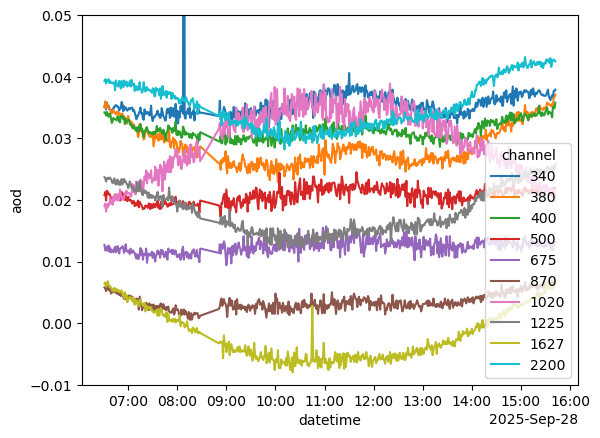

In [70]:
f,a = plt.subplots()
ds_jp_jma_pom.aod.plot.line(x = 'datetime')
a.set_ylim(-0.01,0.05)

In [71]:
p2f = pl.Path('/nfs/grad/campaign/frc/2025/AOD/SE_SMHI_PFR/SE_SMHI_PFR_20250928.aod')
ds = helpers.read_SE_SMHI_PFR(p2f)
ds_se_smhi_pfr = ds

(-0.01, 0.05)

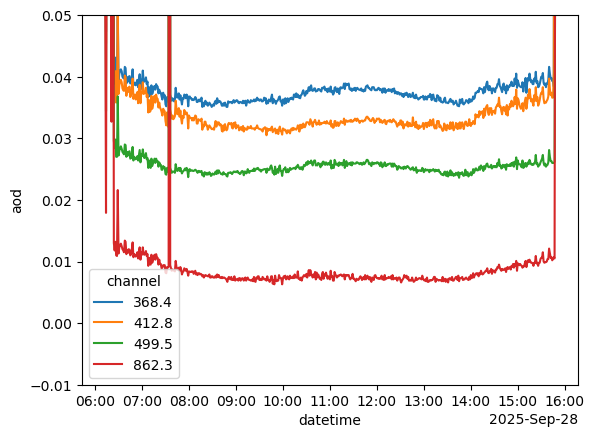

In [72]:
f,a = plt.subplots()
ds.aod.plot.line(x = 'datetime', ax = a)
a.set_ylim(-0.01, 0.05)

In [73]:
ds_jp_jma_pom.channel

<xarray.DataArray 'channel' (channel: 10)> Size: 80B
array([ 340,  380,  400,  500,  675,  870, 1020, 1225, 1627, 2200])
Coordinates:
  * channel  (channel) int64 80B 340 380 400 500 675 870 1020 1225 1627 2200

In [74]:
ds_se_smhi_pfr.channel

<xarray.DataArray 'channel' (channel: 4)> Size: 32B
array([368.4, 412.8, 499.5, 862.3])
Coordinates:
  * channel  (channel) float64 32B 368.4 412.8 499.5 862.3

(-0.01, 0.04)

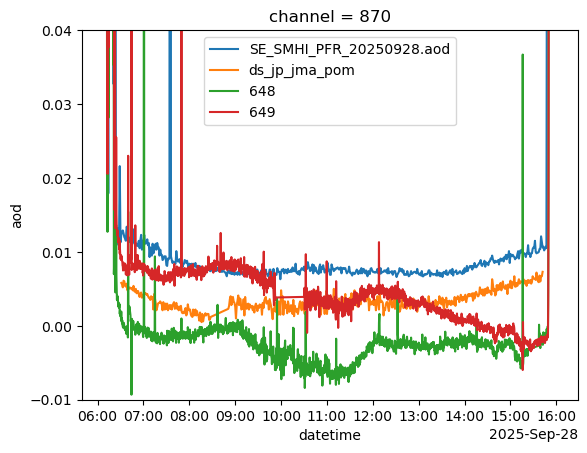

In [75]:
f,a = plt.subplots()
ds_se_smhi_pfr.aod.sel(channel = 862.3).plot(ax = a, label = p2f.name)
ds_jp_jma_pom.aod.sel(channel = 870).plot(ax = a, label = 'ds_jp_jma_pom')
dni648.aod.sel(channel = 870).plot(ax = a, label = '648')
dni649.aod.sel(channel = 870).plot(ax = a, label = '649')

a.legend()
a.set_ylim(-0.01, 0.04)

(-0.01, 0.04)

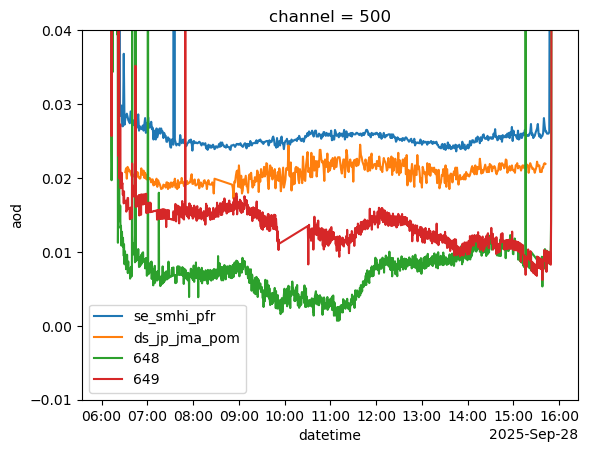

In [76]:
f,a = plt.subplots()
ds_se_smhi_pfr.aod.sel(channel = 499.5).plot(ax = a, label = 'se_smhi_pfr')
ds_jp_jma_pom.aod.sel(channel = 500).plot(ax = a, label = 'ds_jp_jma_pom')
dni648.aod.sel(channel = 500).plot(ax = a, label = '648')
dni649.aod.sel(channel = 500).plot(ax = a, label = '649')
a.legend()
a.set_ylim(-0.01, 0.04)

(-0.01, 0.04)

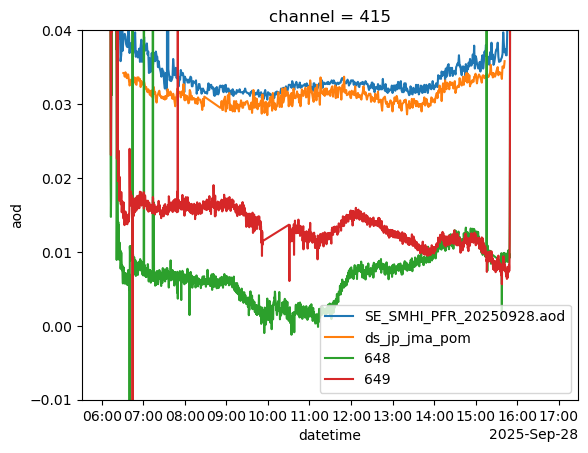

In [77]:
f,a = plt.subplots()#, gridspec_kw={'hspace': 0})
# a = aa[0]
ds_se_smhi_pfr.aod.sel(channel = 412.8).plot(ax = a, label = p2f.name)
ds_jp_jma_pom.aod.sel(channel = 400).plot(ax = a, label = 'ds_jp_jma_pom')
dni648.aod.sel(channel = 415).plot(ax = a, label = '648')
dni649.aod.sel(channel = 415).plot(ax = a, label = '649')

a.legend()
a.set_ylim(-0.01, 0.04)



(np.float64(20359.229923), np.float64(20359.727717))

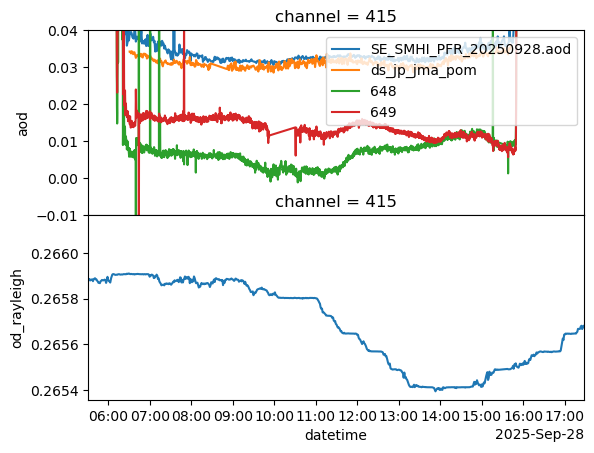

In [78]:
f,aa = plt.subplots(2, gridspec_kw={'hspace': 0})
a = aa[0]
ds_se_smhi_pfr.aod.sel(channel = 412.8).plot(ax = a, label = p2f.name)
ds_jp_jma_pom.aod.sel(channel = 400).plot(ax = a, label = 'ds_jp_jma_pom')
dni648.aod.sel(channel = 415).plot(ax = a, label = '648')
dni649.aod.sel(channel = 415).plot(ax = a, label = '649')

a.legend()
a.set_ylim(-0.01, 0.04)

a = aa[1]
dni648.od_rayleigh.sel(channel = 415).plot.line(x = 'datetime', ax= a)

a.set_xlim(aa[0].get_xlim())

In [80]:
import atmPy.radiation.rayleigh.lab as atmraylab

In [79]:
atmraylab.rayleigh_od_johnsmethod(self.met_data.pressure, chan.values)

NameError: name 'atmraylab' is not defined

In [ ]:
def tau_rayleigh_first_principles(lambda_um, pressure_hpa=1013.25, g=9.80665,
                                  depol_ratio=0.0279):
    """
    Rayleigh optical depth from first principles.

    Physics
    -------
    σ_R(λ) = [24 π^3 / (λ^4 N_s^2)] * [ (n^2 - 1)^2 / (n^2 + 2)^2 ] * F_K
    τ_R(λ, P) = σ_R(λ) * N_col,
    with N_col ≈ P / (m_air * g) for dry air (hydrostatic + ideal gas).

    Where:
      - λ is vacuum wavelength,
      - n(λ) is refractive index of standard dry air,
      - N_s is Loschmidt’s number at STP,
      - F_K is the King correction factor = (6 + 3δ) / (6 - 7δ),
      - m_air is mean molecular mass per molecule of dry air,
      - g is gravitational acceleration.

    Parameters
    ----------
    lambda_um : float or array-like
        Vacuum wavelength(s) in micrometers (µm). Valid ~0.2–2 µm for the
        Peck & Reeder refractivity used here.
    pressure_hpa : float
        Surface pressure in hPa. Defaults to 1013.25 hPa.
    g : float
        Gravitational acceleration [m s^-2]. Default 9.80665.
    depol_ratio : float
        Molecular depolarization ratio δ for dry air (weakly λ-dependent).
        Using a common value δ = 0.0279 yields F_K ≈ 1.061.

    Returns
    -------
    numpy.ndarray or float
        Rayleigh optical depth τ_R at each wavelength.

    Notes
    -----
    - Refractivity uses Peck & Reeder (1972) standard dry air (300 ppm CO2).
    - Loschmidt’s number N_s = 2.54743e25 m^-3 (1013.25 hPa, 288.15 K).
    - Mean molecular mass of dry air m_air = 28.9655e-3 kg/mol / N_A.
    - For sub-percent work, consider wavelength-dependent δ(λ) and a modern
      refractivity (e.g., Ciddor 1996) and adjust for CO2/H2O.

    References
    ----------
    - Bucholtz, A. (1995), J. Atmos. Oceanic Technol., 12, 1043–1052.
    - Bodhaine et al. (1999), J. Atmos. Oceanic Technol., 16, 1854–1861.
    - Peck & Reeder (1972), JOSA, 62, 958–962.
    """
    lam_um = np.asarray(lambda_um, dtype=float)
    lam_m = lam_um * 1e-6  # convert to meters

    # --- Refractive index n(λ): Peck & Reeder (1972), λ in µm ---
    sigma_um_inv = 1.0 / lam_um  # wavenumber in µm^-1
    sigma2 = sigma_um_inv**2
    # (n - 1) * 1e8:
    n_minus_1_1e8 = (
        8060.51
        + 2480990.0 / (132.274 - sigma2)
        + 17455.7 / (39.32957 - sigma2)
    )
    n = 1.0 + n_minus_1_1e8 * 1e-8

    # --- King factor from depolarization ratio δ ---
    delta = float(depol_ratio)
    F_K = (6.0 + 3.0 * delta) / (6.0 - 7.0 * delta)

    # --- Constants ---
    N_s = 2.54743e25  # Loschmidt number at STP [m^-3]
    N_A = 6.02214076e23  # Avogadro [mol^-1]
    m_air = 28.9655e-3 / N_A  # mean mass per molecule of dry air [kg]
    P_pa = pressure_hpa * 100.0  # convert to Pa

    # --- Rayleigh cross-section σ_R(λ) [m^2] ---
    n2 = n * n
    term = ((n2 - 1.0) ** 2) / ((n2 + 2.0) ** 2)
    sigma_R = (24.0 * np.pi**3 / (lam_m**4 * N_s**2)) * term * F_K

    # --- Molecular column N_col [m^-2] from hydrostatic balance ---
    N_col = P_pa / (m_air * g)

    tau = sigma_R * N_col
    return tau.item() if np.ndim(lam_um) == 0 else tau
